## Higher Diploma in Science in Computing (Data Analytics): Machine Learning & Statistics 

***

<div align="center"><h3> Boston House Prices Dataset (Assessment)</h3></div> 
    

    

<img src="https://i.ibb.co/ySfSKpz/boston-house-pic.jpg" alt="boston-house-pic" border="0">

***


<img src="https://image.ibb.co/gw4Gen/Index-GMIT.png" alt="Index-GMIT" border="0">


<div align="center"><h3> Gareth Duffy - g00364693 </h3></div> 

***
<div align="center"><b>Start date: 29th September 2019 - End date: 29th November 2019</div>
    
***

***
### Project objectives
***

This assessment concerns the well-known Boston House Prices dataset and the
Python packages scipy, keras, and jupyter.

- **Describe** (Descriptive statistics and plots to describe the Boston House Prices dataset). *Good summary of the dataset, repository well laid-out
and organised. Reasonable commits to the repository*. **20%**

- **Infer** (Add a section where you use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. Explain and discuss your findings within the notebook). *Appropriate analysis of the relationship between the median house price and whether the house borders the
river, with good explanations of the analysis.* **20%**

- **Predict** (use keras to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset). *Well-trained neural network providing decent predictions
of house prices based on the other variables. Good explanations of how to use the neural network and how it works.* **60%**

***
### Software & dependencies
***

- Hardware used:

HP Pavilion Notebook; Microsoft Windows 10 Home; Processor:Intel(R) Core(TM) i3-5157U CPU @ 2.50GHz, 2494 Mhz, 2 Core(s), 4 Logical Processor(s); RAM: 8GB.

- Software used:

Jupyter Notebook version 5.5.0; Visual Studio Code version 1.37.1; Anaconda version 5.2.0; Python version 3.7.1

- Coding methodology:

All coding and experimentation practices for analysis were implemented entirely with Python with it's associated modules and libraries via the full Anaconda distribution.

***
### Introduction & background research 
***

The Boston housing dataset contains information collected by the US Census Service concerning houses in various areas around the city of Boston, Massachusetts. Each sample corresponds to a unique area and has around a dozen measures. The data was first published in 1978 and is relatively small, i.e. it contains just over 500 examples. The dataset has been used extensively throughout the literature, and notably so on benchmark algorithms. The data was originally published by David Harrison and Daniel Rubinfeld in 1978 with the surprisingly interesting journal title of "Hedonic prices and the demand for clean air" [5].

Their paper investigates the methodological problems associated with the use of the housing market to measure the *willingness* to pay for "clean air". By using a "hedonic" housing price model alongside data for the Boston metropolitan area, the authors offer quantitative estimates of the willingness to pay for air quality improvements. Essentially, the authors held the presumtion that individuals will pay more for a house located in an area with good air quality compared to an otherwise identical unit in an area with poor air quality. Their paper investiagtes the methodological problems associated with the housing market approach because it contained a large number of neighbourhood variables (necessay to isolate the *independent* influence of air pollution) and more reliable air pollution data. They also develop and propose a 4-step procedural model as the basis of their empical investigations. It is an impressive, mathematically-laden paper offering various equations which for example, results in seemingly strong and reliable correlation values [5]. 

<img src="https://i.ibb.co/J5w2F1q/boston-overhead.jpg" alt="boston-overhead" border="0">

The dataset has two target attributes: NOX, in which the nitrous oxide level is to be predicted; and MEDV, in which the median value of a home is to be predicted. On an interesting note, variable 14 (MEDV) appears to be "censored" at 50.00 (corresponding to median price of 50,000 dollars). This fact is suggested by the fact that the highest median price of exactly 50,000 is reported in 16 cases, while 15 cases have prices between 40,000 and 50,000, with prices rounded to the nearest hundred [4]. 

**Yes, air quality influences house prices**

***
### Overview of the dataset
***

***The following describes the dataset columns: [2]***

**CRIM** - per capita crime rate by town

**ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** - proportion of non-retail business acres per town.

**CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**NOX** - nitric oxides concentration (parts per 10 million)

**RM** - average number of rooms per dwelling

**AGE** - proportion of owner-occupied units built prior to 1940

**DIS** - weighted distances to five Boston employment centres

**RAD** - index of accessibility to radial highways

**TAX** - full-value property-tax rate per $10,000

**PTRATIO** - pupil-teacher ratio by town

**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT** - % lower status of the population

**MEDV** - Median value of owner-occupied homes in $1000's

***The 14 variables were originally compartmentalized into 5 different categories: [5]***

- Dependent: MEDV

- Structural: RM, AGE

- Neighbourhood: B, LSTAT, CRIM, ZN, INDUS, TAX, PTRATIO, CHAS

- Accessibility: DIS, RAD

- Air Pollution: NOX, PART*

*PART is omitted from the dataset for reasons (say why): NOX is primarily an automobile pollutant and PART is a stationary source pollutant. 

*** 
### Descriptive summary statistics & plots
***

First let's import the dataset

In [8]:
# Import the required libraries:

import numpy as np
import scipy
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
import sklearn

# Pretty display for notebooks:
%matplotlib inline

# Import the Boston dataset:
from sklearn.datasets import load_boston # [1]
boston_dataset = load_boston()

# Output the dataset keys:
boston_dataset.keys()

# Assign the dataset to the object "Boston"
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [2]:
print("The Boston housing dataset has {} data points with {} variables each.".format(*boston.shape)) # [11]

The Boston housing dataset has 506 data points with 13 variables each.


Yes there are 13 variables, but the main target variable of house price (MEDV) is also latent in the dataset: 

**Dataset keys**:

- data: contains the information for various houses
- target: prices of the house
- feature_names: names of the features
- DESCR: describes the dataset

In [2]:
# Output the dataset:

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Let's unpack the dataset a bit more. For example, we can call any of the keys such as the target variable:

In [3]:
# House price target variable MEDV (in $1000's):

boston_dataset.target 

# Other keys:

# boston_dataset.feature_names
# boston_dataset.data
# boston_dataset.DESCR

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

We'll run a quick check for missing data

In [4]:
# Count all NaN values:

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Great, no missing values here, now let's describe the dataset:

In [13]:
# Describe the basic summary statistics:

boston.describe(include='all').round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000


But where is our target variable house price? It's there, latent however and we need to add it to the dataframe, let's do that and then calculate some typical summary stats relative to this varaible using numpy:

In [10]:
# Give the MEDV target variable a new name and add it to the dataframe:

boston['PRICE'] = boston_dataset.target # "MEDV" is now "PRICE"

# Eyeball the dataset with added PRICE variable:

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Unlike the other feature variables, we still haven't got any descriptive stats from the target variable, let's do that now

In [27]:
# [11]

prices = boston['PRICE']

# Minimum price of the data
min_price = np.amin(prices)

# Maximum price of the data
max_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Boston house price statistics (in $1000's):\n")
print("Minimum price: ${}".format(min_price)) 
print("Maximum price: ${}".format(max_price))
print("Mean price: ${}".format(mean_price)) # error with round function unsure why (TO BE FIXED)
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Boston house price statistics (in $1000's):

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.532806324110698
Median price $21.2
Standard deviation of prices: $9.188011545278206


At first glance the data set appears to be relatively ordinary but we'll be the judge of that once we produce some plots. First let's now plot the distribution of the house price variable:

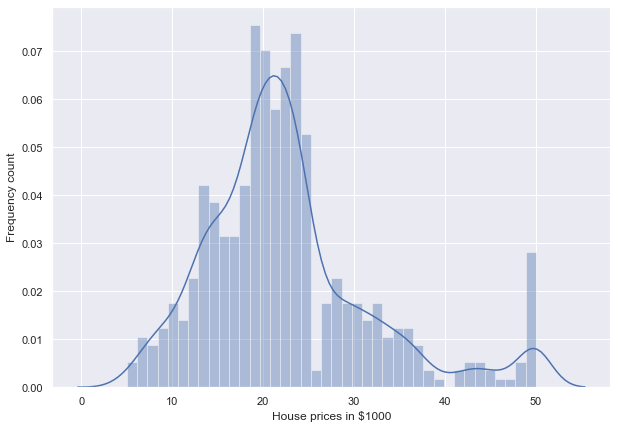

In [28]:
# For this we can use Seaborn:

import seaborn as sns

sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(boston['PRICE'], bins=40)
plt.xlabel("House prices in $1000")
plt.ylabel("Frequency count")
plt.show()

Looking at the distribution, we can see that the house price values are relatively normally distributed, albeit with a small number of outliers, mostly to the right side which is producing a subtle skew. Most house prices lie within %15,000 to $25,000 range.

Plots like the house price distribution are informative and necessary for gauging the scope of the target variable and beginning an analyis but what we reallt want is to extract the most intriguing and interesting aspects of the Boston data. For example, we could plot something that isn't so run-of-the-mill, such as the bivariate density of two features. Below we will plot a density map of carbon monoxide and low-income people [7]. Bivariate data is simply data on each of two variables, where each value of one of the variables is paired with a value of the other variable. This plot is essentially a generalisation of a histogram which provides the best fit lines over the axes and the contour plots inside the axes [10].

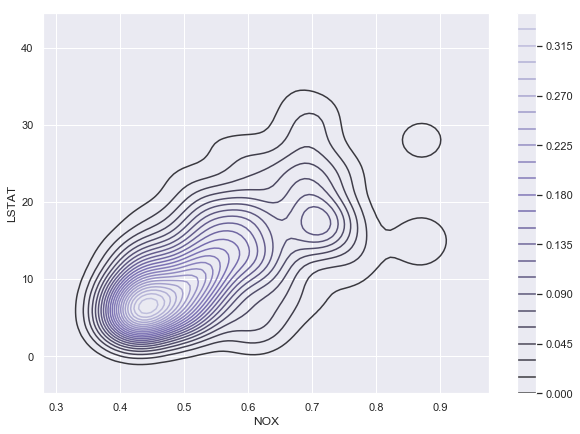

In [13]:
# Bivariate density of carbon monoxide and low income [8]. 

sns.kdeplot(boston["NOX"], boston["LSTAT"],n_levels=30, cmap="Purples_d", cbar= "True") 

Intriguing plot, but it's difficult to envision the height dimensions. So, let's plot the joint distribution and the marginal bivariate distributions together using a jointplot.

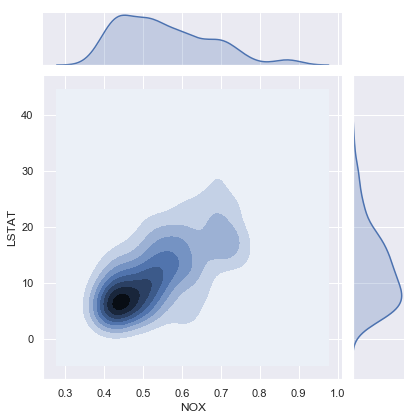

In [70]:
sns.axes_style('whitegrid')
sns.jointplot(boston["NOX"], boston["LSTAT"], boston, kind='kde') # [8].

This is a really interesting plot, we can see that most of the concentration of nitric oxides are found where between 0 and 10 percent of the lower income earners live.

*** 
### Inferential statistics & plots
****

Before we begin making any inferences on the dataset it is good practice to construct a correlation matrix in order to measure the linear relationships that exist among the variables. Moreover, if we wanted to create a multiple regression model to predict house prices it is good practice to create a correlation table first. One of the main reasons for doing this is to check for multicolinearity, e.g. when features (predictor variables) are strongly correlated to one another. Choosing predictors which are highly correlated can have a negative affect on the quality of the regression model. 

The correlation coefficients range from -1 to 1, with - 1 being a very strong negative correlation between two variables and 1 representing a very strong positive relationship. let's take a look.

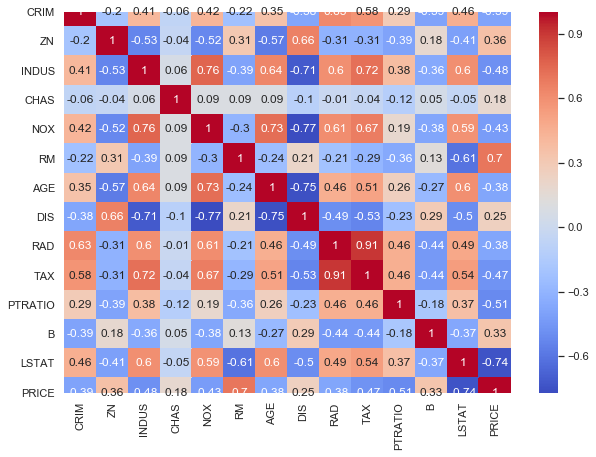

In [38]:
# [3]
sns.set(rc={'figure.figsize':(10,7)})
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

Great, now we have a nice matrix with a heatmap function to enhance the salience of the relationships. We can see there a quite a number or strong relationships, but what are some of the most interesting observations?

- PRICE shares a very strong positive correlation with RM (0.7), which intuitively makes sense. Houses with more rooms are typically more expensive. Indeed, more rooms would imply more space, thereby costing more.

- LSTAT has a very high negative correlation with PRICE (-0.74). This suggests that a notably large percentage of individuals of poor socio economic status live is houses which are of lower value. For a higher LSTAT, we would typically expect to see a lower PRICE. One reason for this may be that in an area dominated by "lower class" individuals would possibly lower the  actual demand or desire to live there. This could be for reasons such as safety, unmaintained or neglected surroundings and so on, thus driving prices down.

- There is a notable positive correlation between LSTAT and measures of NOX (0.59). It is quite unsettling that lower income residents have higher levels of oxides surrounding them.

- Another interesting observation is that there is a strong negative relationship between PTRATIO and PRICE (-0.51). But what might this allude to? It may be the case that where there is a higher pupil to teacher ratio (too many pupils per teacher) there may also be more public schools where house prices are by association, usually also lower. Compare this to areas where houses are more expensive, these areas often have private schools which typically have a lower pupil to teacher ratio. 

- A very strong example of multicolinearity is apparent between TAX and RAD (0.91). It seems the more accessibilty there is for certain dwellings, the more property tax they wil pay. These variables would not be ideal candidates for building a regression model if they were selected together as predictors.

***

Before we conduct the central inferential tests on our data , let's examine the PRICE variable that we are interesed in a little closer. After examining the heatmap above, the most notable variables related to PRICE appear to be bewteen RM, LSTAT and PTRATIO, indeed these variables displayed the highest correlation scores. Let's take a closer look at these relationships below.

In [9]:
boston["RM"]= boston["RM"].round() # Round the room variable
price_rel = boston[["PRICE", "RM", "LSTAT", "PTRATIO"]]

price_rel

,PRICE,RM,LSTAT,PTRATIO
0,24.0,7.0,4.98,15.3
1,21.6,6.0,9.14,17.8
2,34.7,7.0,4.03,17.8
3,33.4,7.0,2.94,18.7
4,36.2,7.0,5.33,18.7
5,28.7,6.0,5.21,18.7
6,22.9,6.0,12.43,15.2
7,27.1,6.0,19.15,15.2
8,16.5,6.0,29.93,15.2
9,18.9,6.0,17.10,15.2


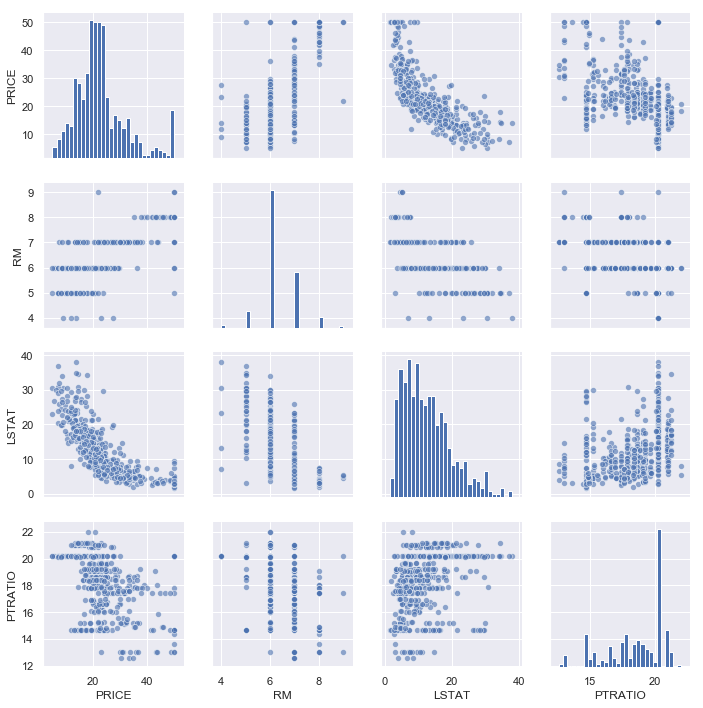

In [21]:
# https://seaborn.pydata.org/tutorial/axis_grids.html

sns.pairplot(price_rel,
plot_kws={'alpha': 0.6},
diag_kws={'bins': 30})

Discuss...

y = -0.950049 x + 34.553841, r: -0.737663, r-squared: 0.544146,
p-value: 0.000000, std_err: 0.038733
Regression line with the scatterplot


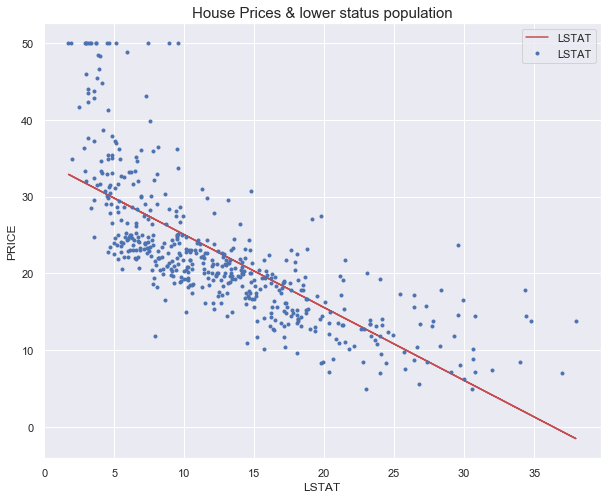

In [71]:
# Regression: [16]
# Using the dataset “Boston”, explore the association between the dependant 
# variable (e.g. PRICE) and the independent variable (e.g.: RM, LSTAT, PTRATIO etc).

# Matplotlib
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

from scipy import stats 
import numpy as np 
x = boston['LSTAT']
y = boston['PRICE'] 

# Using lineregress to determine regression stats and line of best fit:
slope, intercept,r_value, p_value, std_err = stats.linregress(x,y) 
print("y = %f x + %f, r: %f, r-squared: %f,\np-value: %f, std_err: %f" 
      % (beta, beta0, r_value, r_value**2, p_value, std_err))

print("Regression line with the scatterplot") 
yhat = beta * x + beta0 # regression line

# Adjusting the plot width and height
plt.figure(figsize=(10,8)) 

plt.plot(x, yhat, 'r-', x, y,'.') # change y to "yhat"to deletes line points
plt.xlabel('LSTAT') 
plt.ylabel('PRICE') 
plt.title("House Prices & lower status population", size=15)
plt.legend(loc="upper right")
plt.show()

Notice that PRICE and LSTAT have a curvlinear relationship, we can use numpy.polyfit to fit a polynomial line, i.e. a vector of coefficients that minimises the squared error represented by the line.

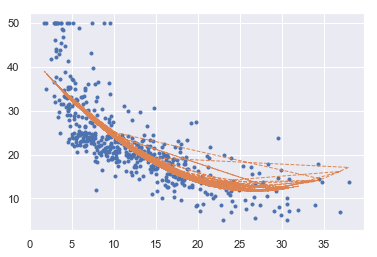

In [70]:
import numpy as np

# Use polyfit: [17]

trend = np.polyfit(x,y,2)
plt.plot(x,y,'.')
trendpoly = np.poly1d(trend) 
plt.plot(x,trendpoly(x), linestyle='dashed',linewidth=1) 

***

ASSUMPTIONS TO BE DISCUSSED, PARAMETRIC VS NON ETC

**Test 1** - Is there a significant difference in median house prices between houses that are along the Charles river and those that aren’t?

Before we try to answer this question, we can visually examine the distribution of house prices under different room numbers and see whether houses on the riverside (CHAS) impact on house prices. For that, we first need to convert the RM variable values to an integer. As they are now, the RM values are in floating point form. We can convert them to integers by using the round function or math.floor function. We'll use the math.floor method.

In [39]:
boston["RM"]

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

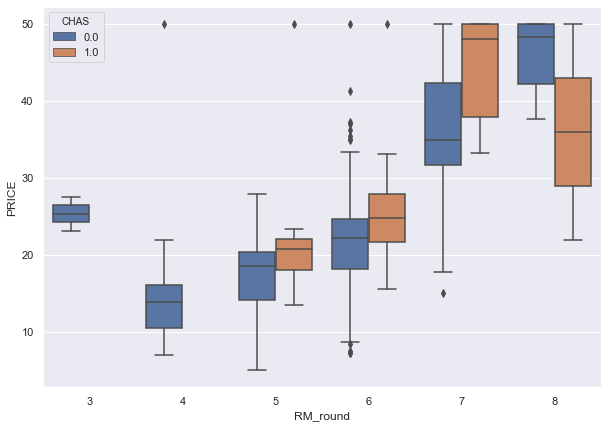

In [40]:
# Round the RM to an integer for visual purposes [9].
import math 

boston["RM_round"] = boston["RM"].map(math.floor)
sns.boxplot(x="RM_round", y = "PRICE", hue = "CHAS", data = boston, orient="v")

The boxplot distributions reveal a very interesting side of the data. Indeed, we can notice a number of interesting features. For example, all houses with less than 5 rooms are not adjacent or close to the river. In addition, houses on the riverside clearly appear to be are more expensive than houses on the other side of or away from river. There are also notably less houses close to the river than those away from it. Let's produce a "5 number summary" based on the CHAS and PRICE features of the plot.

In [41]:
# Five number summary [14]:

print("Below is the 5 number summary of house price arranged by location relative the river:")

print("The medians are:",boston.groupby('CHAS')['PRICE'].median()) # Median
print("The 1st quartiles are:", boston.groupby('CHAS')['PRICE'].quantile(0.25)) # 25th percentile
print("The 3rd quartiles are:",boston.groupby('CHAS')['PRICE'].quantile(0.75)) # 75th percentile
print("The minimum values are:", boston.groupby('CHAS')['PRICE'].min()) # Minimum
print("The maxium values are:", boston.groupby('CHAS')['PRICE'].max()) # Maximum

# Interquartile ranges:

Q1 = boston.groupby('CHAS')['PRICE'].quantile(0.25)
Q3 = boston.groupby('CHAS')['PRICE'].quantile(0.75)

IQR = Q3-Q1 # Formula for IQR

print("The interquartile ranges are:", IQR)

Below is the 5 number summary of house price arranged by location relative the river:
The medians are: CHAS
0.0    20.9
1.0    23.3
Name: PRICE, dtype: float64
The 1st quartiles are: CHAS
0.0    16.6
1.0    21.1
Name: PRICE, dtype: float64
The 3rd quartiles are: CHAS
0.0    24.80
1.0    33.15
Name: PRICE, dtype: float64
The minimum values are: CHAS
0.0     5.0
1.0    13.4
Name: PRICE, dtype: float64
The maxium values are: CHAS
0.0    50.0
1.0    50.0
Name: PRICE, dtype: float64
The interquartile ranges are: CHAS
0.0     8.20
1.0    12.05
Name: PRICE, dtype: float64


Looking at the 5 number summary above we can offer some tentative interpretations. Remember, 0 represents houses that don't bound the river and 1 represents those that do (Discuss further).

Let's take a quick look at the CHAS column:

In [45]:
river = boston['CHAS']
river

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

Let's split the dataset into two. One slice comprised of houses located near the river and the rest which are located
further away from it:

In [46]:
# First we will split the CHAS variable into 2: Houses close to the river and house which are not:

near_river = boston[(boston['CHAS'] == 1)] #
far_river = boston[(boston['CHAS'] == 0)] #

#  Now we'll divide the full dataset based on this variable split:

dfriver = near_river,far_river
dfriver

(        CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
 142  3.32105   0.0  19.58   1.0  0.8710  5.403  100.0  1.3216   5.0  403.0   
 152  1.12658   0.0  19.58   1.0  0.8710  5.012   88.0  1.6102   5.0  403.0   
 154  1.41385   0.0  19.58   1.0  0.8710  6.129   96.0  1.7494   5.0  403.0   
 155  3.53501   0.0  19.58   1.0  0.8710  6.152   82.6  1.7455   5.0  403.0   
 160  1.27346   0.0  19.58   1.0  0.6050  6.250   92.6  1.7984   5.0  403.0   
 162  1.83377   0.0  19.58   1.0  0.6050  7.802   98.2  2.0407   5.0  403.0   
 163  1.51902   0.0  19.58   1.0  0.6050  8.375   93.9  2.1620   5.0  403.0   
 208  0.13587   0.0  10.59   1.0  0.4890  6.064   59.1  4.2392   4.0  277.0   
 209  0.43571   0.0  10.59   1.0  0.4890  5.344  100.0  3.8750   4.0  277.0   
 210  0.17446   0.0  10.59   1.0  0.4890  5.960   92.1  3.8771   4.0  277.0   
 211  0.37578   0.0  10.59   1.0  0.4890  5.404   88.6  3.6650   4.0  277.0   
 212  0.21719   0.0  10.59   1.0  0.4890  5.807   53

Great, now let's eyeball thw house prices pertaining to both cohorts of house owners based on our variable split:

In [47]:
# Filter all house prices based on houses being located near the river:

near_river['PRICE']

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: PRICE, dtype: float64

In [63]:
# And filter prices based on far from river:

far_river['PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 471, dtype: float64

Interesting, it seems like far more people live away from the river than close to it, let's check anyway:

In [24]:
# Output column value count:

print(near_river.count())
print(far_river.count())

CRIM        35
ZN          35
INDUS       35
CHAS        35
NOX         35
RM          35
AGE         35
DIS         35
RAD         35
TAX         35
PTRATIO     35
B           35
LSTAT       35
PRICE       35
RM_round    35
dtype: int64
CRIM        471
ZN          471
INDUS       471
CHAS        471
NOX         471
RM          471
AGE         471
DIS         471
RAD         471
TAX         471
PTRATIO     471
B           471
LSTAT       471
PRICE       471
RM_round    471
dtype: int64


So, 35 houses are located adjacent to the river while 471 are situated further away. But let's get back to our initial question around the difference in median house price, what are the median house prices?

In [25]:
# Median values for both cohorts:

print("Median house price near river",near_river['PRICE'].median())
print("Median house price far from river",far_river['PRICE'].median())

Median house price near river 23.3
Median house price far from river 20.9


Looking at the output above, can we tell if there is a significant difference? Not really, for that we'll run a median t-test. Here, we want to conduct a test to see if there is a notable difference between the two medians of the assumingly unrelated groups. Like almost all inferential tests, a t-test comes with assumptions. The assumptions that the data must adhere to in order for the results to be valid are as follows [18]:

- The group samples are independently and randomly drawn
- The distribution of the residuals between the two groups should follow a normal distribution.
- The variances of the two groups are equal.

[18]: https://pythonfordatascience.org/independent-t-test-python/ 

**But why use median and not mean as a measurement?**
..
Most of the time we would use a t-test based on the mean (Discuss).

**What type of median test should we use?**

The typical choice of median test is either a *Kruskal Wallis H-test* or a *Moods Median test*. Although both tests are of the non-parametric variety, they are both very reliable. That said, we will focus mainly on the Moods Median Test result. Let's compare the qualities of both and test them out:

- ***Kruskal Wallis Test***: The Kruskal–Wallis H-test is a non-parametric method for testing whether samples originate from the same distribution. It is used for comparing two or more independent samples of equal or different sample sizes. It is used for comparing only two groups. A significant Kruskal–Wallis test indicates that at least one sample stochastically dominates one other sample. Since it is a non-parametric method, the Kruskal–Wallis test *does not assume a normal distribution of the residuals*. If the researcher can make the assumptions of an identically shaped and scaled distribution for all groups, except for any difference in medians, then the null hypothesis is that the medians of all groups are equal, and the alternative hypothesis is that at least one population median of one group is different from the population median of at least one other group [6]. 


- ***Moods Median Test***: Mood's median test is a special case of Pearson's chi-squared test. It is aslo a nonparametric test that tests the null hypothesis that the medians of the populations from which two or more samples are drawn are identical. The data in each sample are assigned to two groups, one consisting of data whose values are higher than the median value in the two groups combined, and the other consisting of data whose values are at the median or below. A Pearson's chi-squared test is then used to determine whether the observed frequencies in each sample differ from expected frequencies derived from a distribution combining the two groups [15]. With SciPy, the Moods Median tests that two or more samples come from populations with the same median. The “grand median” of all the data is computed, and a contingency table is formed by classifying the values in each sample as being above or below the grand median [6].

Before we try any testing, lets check the variance, skewness and kurtosis of the groups then check our assumptions.

In [55]:
# Check for skewness, kurtosis and variance [18] TO BE REF'D
# Output to be better formatted*

from scipy import stats

print(stats.describe(far_river['PRICE']))
print(stats.describe(near_river['PRICE']))


DescribeResult(nobs=471, minmax=(5.0, 50.0), mean=22.093842887473464, variance=77.9929620093057, skewness=1.0535392064190594, kurtosis=1.512342873001833)
DescribeResult(nobs=35, minmax=(13.4, 50.0), mean=28.439999999999998, variance=139.63305882352938, skewness=0.9021059082456354, kurtosis=-0.5438936600086546)


Let's begin our assumptions check. First we will check the homogeneity of variances using Levene's test in scipy.stats. Provided the Levene result's p value is not significant we can proceed with confidence. Let's take a look.

In [75]:
stats.levene(far_river['PRICE'], near_river['PRICE'])

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

Discuss result of Levene

Next we must check the assumption of normality. Here the residuals should be normally distributed. To calculate the residuals between the two groups we simply subtract the values of one from the other:

In [89]:
# The index’s should be reset so the residuals can be 
# calculated later:
far_river.reset_index(inplace= True)
near_river.reset_index(inplace= True)

# Calculate the residuals between the groups:
diff = far_river['PRICE'] - near_river['PRICE']
diff

0      10.6
1       6.3
2      17.7
3      17.8
4       9.2
       ... 
466     NaN
467     NaN
468     NaN
469     NaN
470     NaN
Name: PRICE, Length: 471, dtype: float64

We can check the normality visually or with a formula test. Visually, we could use a qq plot, pp plot or histogram. Alternatively we can also use the Shapiro-Wilk test for normality. (TO BE FINISHED).

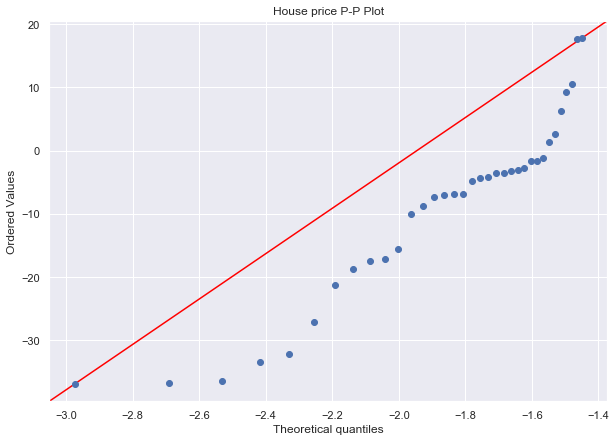

In [87]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

# Add plot line for comparison [19]: ADD REF: https://stackoverflow.com/questions/40516661/adding-line-to-scatter-plot-using-pythons-matplotlib
fig, ax = plt.subplots()
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

stats.probplot(diff, plot= plt)
plt.title('House price P-P Plot') 
plt.show('House price residuals')

With pp plots, the dots should fall on the red line. If the dots are not on the red line then it’s an indication that there is deviation from normality. Some deviations from normality is fine, as long as it’s not severe. So, with ours it doesn't seem to be too severe. The p-p plot shows that the data maintains normality. Let’s take a look at the histogram next.

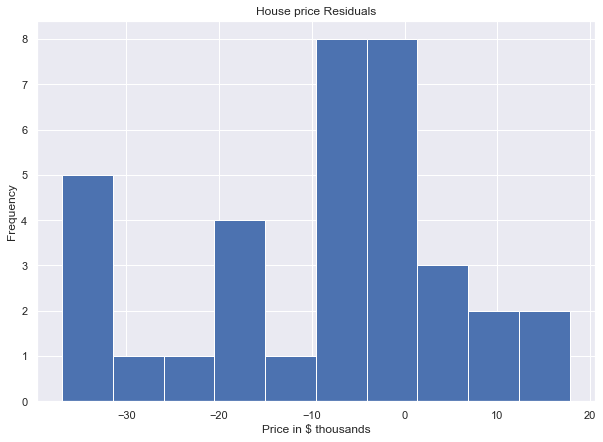

In [85]:
diff.plot(kind= "hist", title= "House price Residuals")
plt.xlabel("Price in $ thousands")
plt.show("Residuals Plot of House price")

In [93]:
# Now the Shaprio-Wilk test:
# Error, needs to be resolved
print(stats.shapiro(diff))

(nan, 1.0)


Now let's get testing our groups.

***
**Kruskal Wallis  H-test**:

In [38]:
# [12]
# non-parametric method:
# Kruskal Wallis  H-test tests the null hypothesis that the population median of all of the groups are equal. 
# It is a non-parametric version of ANOVA.

from scipy import stats
stats.kruskal(near_river['PRICE'], far_river['PRICE'])

KruskalResult(statistic=9.984747790841892, pvalue=0.001578421729426335)

Thus, we can see the p value shows a significant difference in median house prices. In fact, a highly significant one. This means that house which are located where the tract bounds the river are significantly *more* expensive than houses which don't. Interestingly, there are notably less of these expensive houses in the dataset compared to ones less expensive. 

In [39]:
# [13]

from scipy.stats import kruskal

# compare samples
stat, p = kruskal(near_river['PRICE'], far_river['PRICE'])
print('Statistic =%.4f, \np =%.4f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions, (reject H0)')

Statistic =9.9847, 
p =0.0016
Different distributions, (reject H0)


**Moods Median Test:**

In [40]:
# [6] 

from scipy.stats import median_test
from statistics import median
stat, p, med, tbl = median_test(near_river['PRICE'], far_river['PRICE'])

In [41]:
# The grand median

med

21.2

In [42]:
# The contingency table:
# The shape of the table is (2, n), where n is the number of samples. 
# The first row holds the counts of the values above the grand median, 
# and the second row holds the counts of the values below the grand median. 
# The table allows further analysis with, for example, scipy.stats.chi2_contingency

tbl

array([[ 26, 224],
       [  9, 247]], dtype=int64)

In [43]:
# The p value of the median test:

p

0.004026327394058504

In [44]:
# The test statistic: 
# The statistic that is returned is determined by lambda_. 
# The default is Pearson’s chi-squared statistic.

stat

8.271903391340615

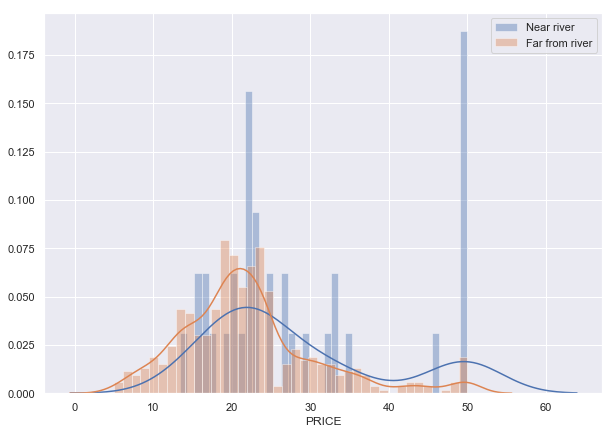

In [46]:
# As before when we plotted the distribution of house prices but this time 
# differenciated by colour:

sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(near_river['PRICE'], bins=40, label='Near river')
sns.distplot(far_river['PRICE'], bins=40, label='Far from river')
plt.legend()
plt.show()

**Interpretation of median test results**

Explain and discuss your findings. Appropriate analysis of the relationship between the median house price and whether the house borders the river, with good explanations of the analysis.

***
### Implementing a neural network to predict house prices
***

Might use RM LSTAT and PTRATIO as predictors

Plot how each weight influences PRICE

RM is the average number of rooms among homes in the neighborhood.

LSTAT essentially measures neighbourhood poverty level as a percentage, i.e. the percentage of homeowners in the neighborhood considered "lower class" (working poor).

PTRATIO is the ratio of students to teachers in primary and secondary schools in the neighborhood.


**EXPERIMENTATION of neural nets:

This is a well-studied problem in machine learning.

In [11]:
# https://www.kdnuggets.com/2018/06/basic-keras-neural-network-sequential-model.html

***
### Additional exploratory analyses
***

Possibilities/tentative hypotheses: 

T-test to see if houses with more rooms (larger RM value) are worth more (directly proportional). Linear Reg

There will be a higher crime rate (CRIM) around lower priced houses. Linear Reg

Neighbourhoods (measured by house price) with lower PTRATIO will be worth less
(inversely proportional). Linear Reg

*** 
### Evaluation & discussion
***

***
### Insights learned & personal reflection
***

***
### References
***

[1]. Scikit-learn developers (2019). *sklearn.datasets.load_boston*. Retrieved 29/09/19 from: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

[2]. Multiple authors (2018). *The Boston Housing Dataset*. Retrieved 30/09/19 from: https://www.kaggle.com/prasadperera/the-boston-housing-dataset

[3]. Gupta, A. (2019). *Sklearn Linear Regression Tutorial with Boston House Dataset*. Retrieved 30/09/19 from: https://medium.c*.om/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a

[4]. DELVE (1996).*The Boston Housing Dataset*. Retrieved 01/10/19 from: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

[5]. Harrison, D. & Rubinfeld, D.L. (1978). "Hedonic prices and the demand for clean air", *J. Environ. Economics & Management,* vol.5, 81-102

[6]. SciPy developers. (2015). *scipy.stats.median_test*.Retrieved 04/10/19 from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html

[7]. Unknown author. (2019) *Seaborn Drawing Getting Started Practice*. Retrieved 07/10/19 from:http://www.programmersought.com/article/312818921/

[8]. Waskom, M. (2018). *seaborn.kdeplot*. Retrieved 07/10/19 from: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

[9]. Python Documentation. (2019). *Numeric and Mathematical Modules*. Retrieved 07/10/19 from https://docs.python.org/2/library/math.html

[10]. Mutiple authors. (2019). *Bivariate data*. Retrieved 07/10/19 from: https://en.wikipedia.org/wiki/Bivariate_data

[11]. Roman, V. (2019). *Machine Learning Project: Predicting Boston House Prices With Regression*. Retrieved 07/10/19 from https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

[12]. SciPy developers. (2015). *scipy.stats.kruskal*.Retrieved 04/10/19 from:https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal

[13]. Brownlee, J. (2018). *Nonparametric statistical significance tests in python*. Retrieved 04/10/19 from:https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

[14]. Duffy, G. (2018). *Boxplots: An investigation into the history, utility, and relevance of the plot*. Retrieved 08/10/19 from: https://github.com/Datagatherer2357/Project-Fundamentals-of-data-analysis-GMIT

[15]. Multiple authors. (2019). *Median test*. Retrieved 08/10/19 from: https://en.wikipedia.org/wiki/Median_test

[16]. Duchesnay, E. & Löfstedt, T. (2019). Statistics and Machine Learning in Python. 

[17]. Chubarov, D. (2017). *Stackoverflow: how to use Numpy.polyfit to plot trend*. Retrieved 22/10/19 from: https://stackoverflow.com/questions/46627629/how-to-use-numpy-polyfit-to-plot-trend



***
### Appendices
***